In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
len(df['CustomerId'].unique())

10000

<AxesSubplot:xlabel='Gender', ylabel='count'>

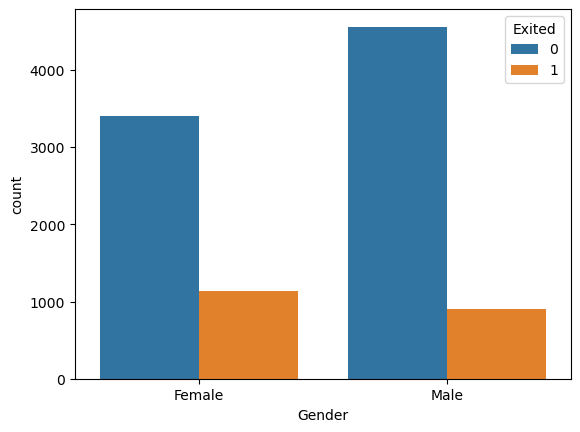

In [17]:
sns.countplot(data=df, x='Gender', hue='Exited')

<AxesSubplot:xlabel='Exited', ylabel='count'>

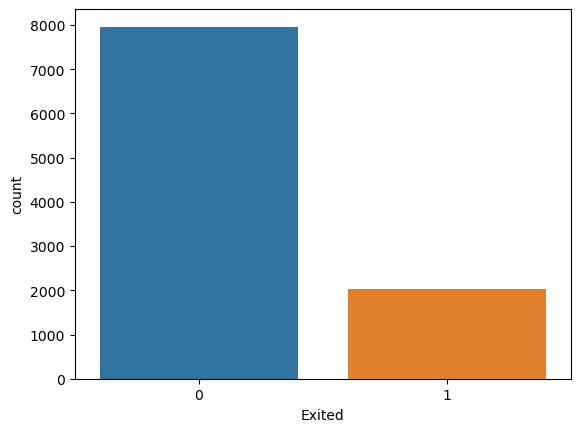

In [18]:
sns.countplot(data=df, x='Exited')

In [20]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='count'>

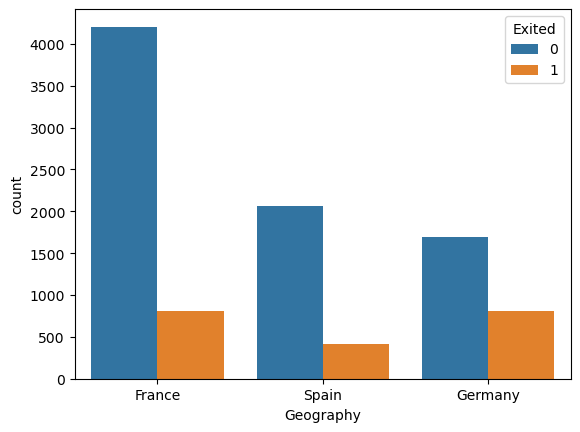

In [23]:
sns.countplot(data=df, x='Geography', hue='Exited')

In [24]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = le.fit_transform(df[column])

C:\Users\chour\AppData\Local\Temp\ipykernel_16984\3447786509.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [31]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,2736,1115,228,0,0,24,2,0.00,0,1,1,101348.88,1
1,1,3258,1177,217,2,0,23,1,83807.86,0,0,1,112542.58,0
2,2,2104,2040,111,0,0,24,8,159660.80,2,1,0,113931.57,1
3,3,5435,289,308,0,0,21,1,0.00,1,0,0,93826.63,0
4,4,6899,1822,459,2,0,25,2,125510.82,0,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1599,1999,380,0,1,21,5,0.00,1,1,0,96270.64,0
9996,9996,161,1336,125,0,1,17,10,57369.61,0,1,1,101699.77,0
9997,9997,717,1570,318,0,0,18,7,0.00,0,0,1,42085.58,1
9998,9998,4656,2345,381,1,1,24,3,75075.31,1,1,0,92888.52,1


In [32]:
X = df.drop(['RowNumber', 'CustomerId', 'Exited'], axis=1)

In [33]:
X

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1115,228,0,0,24,2,0.00,0,1,1,101348.88
1,1177,217,2,0,23,1,83807.86,0,0,1,112542.58
2,2040,111,0,0,24,8,159660.80,2,1,0,113931.57
3,289,308,0,0,21,1,0.00,1,0,0,93826.63
4,1822,459,2,0,25,2,125510.82,0,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,1999,380,0,1,21,5,0.00,1,1,0,96270.64
9996,1336,125,0,1,17,10,57369.61,0,1,1,101699.77
9997,1570,318,0,0,18,7,0.00,0,0,1,42085.58
9998,2345,381,1,1,24,3,75075.31,1,1,0,92888.52


In [34]:
y = df['Exited']

In [35]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [38]:
X_train.shape

(8000, 11)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
scaler.fit(X_train)

StandardScaler()

In [43]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [44]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [54]:
def report(model):
    preds = model.predict(scaled_X_test)
    print(classification_report(y_test,preds))
    ConfusionMatrixDisplay.from_estimator(model,scaled_X_test,y_test)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log_model = LogisticRegression()

In [48]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [49]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(scaled_X_train, y_train)

SVC()

In [50]:
from sklearn.svm import LinearSVC
linear_svc_model = LinearSVC()
linear_svc_model.fit(scaled_X_train, y_train)

LinearSVC()

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(scaled_X_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1577
           1       0.63      0.17      0.27       423

    accuracy                           0.80      2000
   macro avg       0.72      0.57      0.58      2000
weighted avg       0.77      0.80      0.76      2000



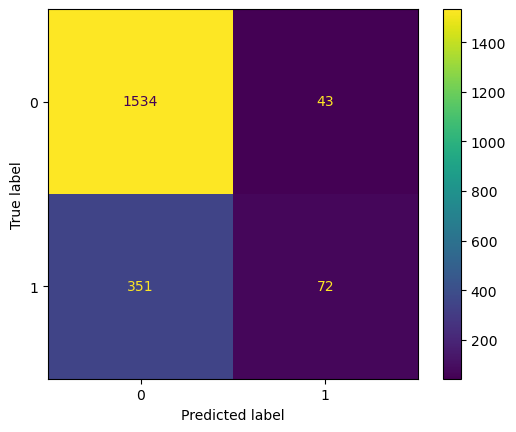

In [55]:
report(log_model)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1577
           1       0.85      0.40      0.55       423

    accuracy                           0.86      2000
   macro avg       0.86      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



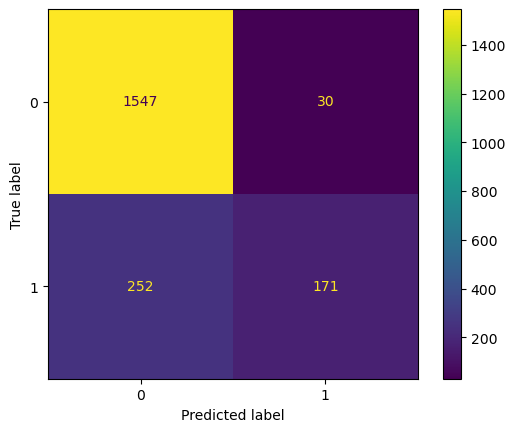

In [56]:
report(svc_model)

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1577
           1       0.53      0.08      0.14       423

    accuracy                           0.79      2000
   macro avg       0.67      0.53      0.51      2000
weighted avg       0.74      0.79      0.72      2000



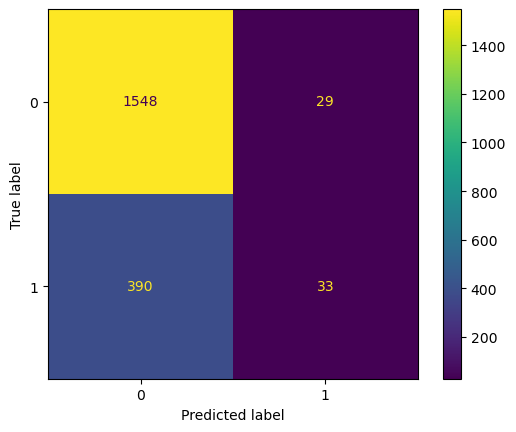

In [57]:
report(linear_svc_model)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1577
           1       0.79      0.48      0.60       423

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.86      0.85      2000



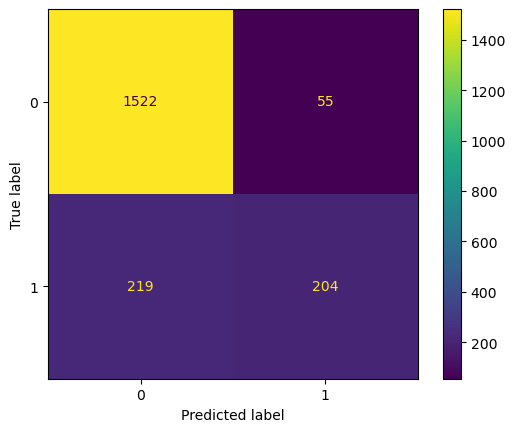

In [58]:
report(rfc_model)

In [59]:
from sklearn.model_selection import GridSearchCV

In [63]:
C = [2, 3, 4, 5]
kernel = ['poly', 'rbf', 'sigmoid']
degree = [2, 3, 4]
gamma = ['scale', 'auto']
param_grid = {'C': C,
             'kernel': kernel,
             'degree': degree,
             'gamma': gamma}

In [64]:
grid_model = GridSearchCV(svc_model, param_grid)

In [65]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [2, 3, 4, 5], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [66]:
grid_model.best_params_

{'C': 2, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1577
           1       0.82      0.43      0.56       423

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



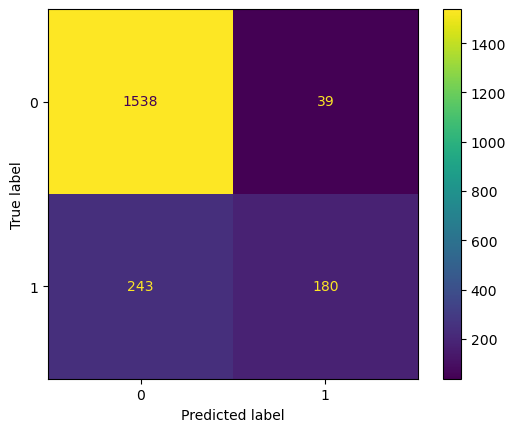

In [67]:
report(grid_model)

In [69]:
final_model = SVC(C=2, kernel='rbf', gamma='auto')

In [71]:
final_model.fit(X, y)

SVC(C=2, gamma='auto')

In [76]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,2736,1115,228,0,0,24,2,0.00,0,1,1,101348.88,1
1,1,3258,1177,217,2,0,23,1,83807.86,0,0,1,112542.58,0
2,2,2104,2040,111,0,0,24,8,159660.80,2,1,0,113931.57,1
3,3,5435,289,308,0,0,21,1,0.00,1,0,0,93826.63,0
4,4,6899,1822,459,2,0,25,2,125510.82,0,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1599,1999,380,0,1,21,5,0.00,1,1,0,96270.64,0
9996,9996,161,1336,125,0,1,17,10,57369.61,0,1,1,101699.77,0
9997,9997,717,1570,318,0,0,18,7,0.00,0,0,1,42085.58,1
9998,9998,4656,2345,381,1,1,24,3,75075.31,1,1,0,92888.52,1


In [79]:
new_data = [[1115, 228, 0, 0, 24, 2, 0.00, 0, 1, 1, 101348.88]]
final_model.predict(new_data)

C:\Users\chour\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [72]:
import joblib

In [73]:
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

In [74]:
X.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary'],
      dtype='object')

In [75]:
joblib.dump(list(X.columns), 'columns.pkl')

['columns.pkl']